In [34]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:

df=pd.read_excel('travel_destinations.xlsx')


In [3]:
df.head()  # Display the first few rows of the DataFrame

,City,Country,Category,Best_Time_to_Travel
0,London,United Kingdom,"history, culture, museums, theatre, shopping, ...","Apr, May, Jun, Sep, Oct"
1,Paris,France,"art, museums, landmarks, culture, history, foo...","Apr, May, Jun, Sep, Oct"
2,Rome,Italy,"history, ancient ruins, culture, art, food, re...","Apr, May, Jun, Sep, Oct"
3,Berlin,Germany,"history, culture, nightlife, art, museums, music","May, Jun, Jul, Aug, Sep"
4,Madrid,Spain,"art, museums, nightlife, food, culture, histor...","Apr, May, Jun, Sep, Oct"


In [4]:
print(df['Country'].unique())

['United Kingdom' 'France' 'Italy' 'Germany' 'Spain' 'Czech Republic'
 'Netherlands' 'Greece' 'Portugal' 'Switzerland' 'Iceland' 'Austria'
 'Ireland' 'Denmark' 'Sweden' 'Japan' 'South Korea' 'China' 'Thailand'
 'Singapore' 'Indonesia' 'Vietnam' 'India' 'United Arab Emirates' 'Turkey'
 'USA' 'Canada' 'Mexico' 'Brazil' 'Argentina' 'Peru' 'Chile' 'Colombia'
 'Australia' 'New Zealand' 'Poland' 'Hungary' 'Belgium' 'Norway'
 'Malaysia' 'Nepal' 'Israel' 'Ecuador' 'Sri Lanka' 'Morocco' 'Egypt'
 'Jordan' 'Russia' 'Finland' 'Taiwan' 'Philippines' 'Cambodia' 'Laos'
 'South Africa' 'Kenya' 'Tanzania' 'Cuba' 'Panama' 'Fiji'
 'French Polynesia' 'Croatia' 'Maldives' 'Zambia/Zimbabwe' 'Botswana'
 'Bolivia']


In [5]:
df['Country'] = df['Country'].str.strip()
india_count = (df['Country'] == 'India').sum()

In [6]:
print(india_count)


64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 215 non-null    object
 1   Country              215 non-null    object
 2   Category             215 non-null    object
 3   Best_Time_to_Travel  215 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [8]:
print(df.isnull().sum())


City                   0
Country                0
Category               0
Best_Time_to_Travel    0
dtype: int64


In [9]:
ohe_df = pd.get_dummies(df, columns=['Country'])
print(ohe_df.shape)

(215, 68)


In [10]:
# ohe=ohe_df.drop(columns=['Country_encoded'], inplace=True)
ohe_df.head()

,City,Category,Best_Time_to_Travel,Country_Argentina,Country_Australia,Country_Austria,Country_Belgium,Country_Bolivia,Country_Botswana,Country_Brazil,...,Country_Switzerland,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Turkey,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Vietnam,Country_Zambia/Zimbabwe
0,London,"history, culture, museums, theatre, shopping, ...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Paris,"art, museums, landmarks, culture, history, foo...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Rome,"history, ancient ruins, culture, art, food, re...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Berlin,"history, culture, nightlife, art, museums, music","May, Jun, Jul, Aug, Sep",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Madrid,"art, museums, nightlife, food, culture, histor...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
X_features = ohe_df.drop(columns=['City'])


In [12]:
X_features.head() 

,Category,Best_Time_to_Travel,Country_Argentina,Country_Australia,Country_Austria,Country_Belgium,Country_Bolivia,Country_Botswana,Country_Brazil,Country_Cambodia,...,Country_Switzerland,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Turkey,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Vietnam,Country_Zambia/Zimbabwe
0,"history, culture, museums, theatre, shopping, ...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,"art, museums, landmarks, culture, history, foo...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"history, ancient ruins, culture, art, food, re...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"history, culture, nightlife, art, museums, music","May, Jun, Jul, Aug, Sep",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"art, museums, nightlife, food, culture, histor...","Apr, May, Jun, Sep, Oct",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
months   = {
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
}
def extract_months(text):
    pattern = r'\b(' + '|'.join(months) + r')\b'
    found_months = re.findall(pattern, text, re.IGNORECASE)
    return [month.capitalize() for month in found_months]



In [14]:
X_features['best_time_list'] = X_features['Best_Time_to_Travel'].apply(extract_months)
X_features.drop(columns=['Best_Time_to_Travel'], inplace=True)

In [15]:
def preprocess(text):
    text = text.lower()  
    text = re.sub(r'[,\(\)]', ' ', text)
    tokens = text.split()
    return tokens

In [16]:
X_features['tokens'] = X_features['Category'].apply(preprocess)
X_features.drop(columns=['Category'], inplace=True)


In [17]:
X_features.head()  

,Country_Argentina,Country_Australia,Country_Austria,Country_Belgium,Country_Bolivia,Country_Botswana,Country_Brazil,Country_Cambodia,Country_Canada,Country_Chile,...,Country_Tanzania,Country_Thailand,Country_Turkey,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Vietnam,Country_Zambia/Zimbabwe,best_time_list,tokens
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,"[Apr, May, Jun, Sep, Oct]","[history, culture, museums, theatre, shopping,..."
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"[Apr, May, Jun, Sep, Oct]","[art, museums, landmarks, culture, history, fo..."
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"[Apr, May, Jun, Sep, Oct]","[history, ancient, ruins, culture, art, food, ..."
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"[May, Jun, Jul, Aug, Sep]","[history, culture, nightlife, art, museums, mu..."
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"[Apr, May, Jun, Sep, Oct]","[art, museums, nightlife, food, culture, histo..."


In [18]:
country_cols = [col for col in X_features.columns if col.startswith('Country_')]


In [19]:
X_country = X_features[country_cols]
pca = PCA(n_components=5, random_state=42)
X_country_pca = pca.fit_transform(X_country)
X_country_pca_df = pd.DataFrame(X_country_pca, columns=[f'Country_PCA_{i+1}' for i in range(5)])
X_features = pd.concat([X_features, X_country_pca_df], axis=1)

In [20]:
X_features.drop(columns=country_cols, inplace=True)
X_features = X_features.loc[:, ~X_features.columns.duplicated()]  # Remove duplicate columns
X_features.head()  


,best_time_list,tokens,Country_PCA_1,Country_PCA_2,Country_PCA_3,Country_PCA_4,Country_PCA_5
0,"[Apr, May, Jun, Sep, Oct]","[history, culture, museums, theatre, shopping,...",-0.289581,-0.104868,-0.043624,-0.042221,8.218724e-16
1,"[Apr, May, Jun, Sep, Oct]","[art, museums, landmarks, culture, history, fo...",-0.289581,-0.104868,-0.043624,-0.042221,9.335400e-16
2,"[Apr, May, Jun, Sep, Oct]","[history, ancient, ruins, culture, art, food, ...",-0.296417,-0.115632,-0.059075,-0.064795,5.370054e-16
3,"[May, Jun, Jul, Aug, Sep]","[history, culture, nightlife, art, museums, mu...",-0.289581,-0.104868,-0.043624,-0.042221,1.812545e-16
4,"[Apr, May, Jun, Sep, Oct]","[art, museums, nightlife, food, culture, histo...",-0.289581,-0.104868,-0.043624,-0.042221,-2.437764e-16


In [21]:
mlb = MultiLabelBinarizer()
month_features = mlb.fit_transform(X_features['best_time_list'])
month_df = pd.DataFrame(month_features, columns=[f'month_{c}' for c in mlb.classes_])
month_df.head()
X_features_updated = pd.concat([X_features, month_df], axis=1)
X_features_updated.drop(columns=['best_time_list'], inplace=True)

In [22]:
quarters = {
    'Q1': ['month_Jan', 'month_Feb', 'month_Mar'],
    'Q2': ['month_Apr', 'month_May', 'month_Jun'],
    'Q3': ['month_Jul', 'month_Aug', 'month_Sep'],
    'Q4': ['month_Oct', 'month_Nov', 'month_Dec']
}

for q, months in quarters.items():
    X_features_updated[q] = X_features_updated[months].max(axis=1)

X_features_updated.drop(columns=sum(quarters.values(), []), inplace=True)
X_features_updated.head()

,tokens,Country_PCA_1,Country_PCA_2,Country_PCA_3,Country_PCA_4,Country_PCA_5,Q1,Q2,Q3,Q4
0,"[history, culture, museums, theatre, shopping,...",-0.289581,-0.104868,-0.043624,-0.042221,8.218724e-16,0,1,1,1
1,"[art, museums, landmarks, culture, history, fo...",-0.289581,-0.104868,-0.043624,-0.042221,9.335400e-16,0,1,1,1
2,"[history, ancient, ruins, culture, art, food, ...",-0.296417,-0.115632,-0.059075,-0.064795,5.370054e-16,0,1,1,1
3,"[history, culture, nightlife, art, museums, mu...",-0.289581,-0.104868,-0.043624,-0.042221,1.812545e-16,0,1,1,0
4,"[art, museums, nightlife, food, culture, histo...",-0.289581,-0.104868,-0.043624,-0.042221,-2.437764e-16,0,1,1,1


In [23]:
quarter_cols = ['Q1','Q2','Q3','Q4']
pca_months = PCA(n_components=1, random_state=42)
visit_time = pca_months.fit_transform(X_features_updated[quarter_cols])


In [24]:
X_features_updated['visit_time'] = visit_time
X_features_updated.drop(columns=quarter_cols, inplace=True)
X_features_updated.head()

,tokens,Country_PCA_1,Country_PCA_2,Country_PCA_3,Country_PCA_4,Country_PCA_5,visit_time
0,"[history, culture, museums, theatre, shopping,...",-0.289581,-0.104868,-0.043624,-0.042221,8.218724e-16,0.717291
1,"[art, museums, landmarks, culture, history, fo...",-0.289581,-0.104868,-0.043624,-0.042221,9.335400e-16,0.717291
2,"[history, ancient, ruins, culture, art, food, ...",-0.296417,-0.115632,-0.059075,-0.064795,5.370054e-16,0.717291
3,"[history, culture, nightlife, art, museums, mu...",-0.289581,-0.104868,-0.043624,-0.042221,1.812545e-16,1.034606
4,"[art, museums, nightlife, food, culture, histo...",-0.289581,-0.104868,-0.043624,-0.042221,-2.437764e-16,0.717291


In [25]:
import gensim.downloader as api

# This will download the model (the first time you run it). 
# It may take a few minutes.
print("Loading pre-trained GloVe model...")
glove_model = api.load('glove-wiki-gigaword-50')  # smallest is 50, no 30 available
print("Model loaded successfully!")

Loading pre-trained GloVe model...
Model loaded successfully!


In [26]:
vocab = set(word for token_list in X_features_updated['tokens'] for word in token_list)

print(f"Created a vocabulary set with {len(vocab)} unique words.")

Created a vocabulary set with 588 unique words.


In [27]:
def tokens_to_vector(tokens, model, vector_size=100):
    vectors = [model[word] for word in tokens if word in model]
    if not vectors:  # If no words are in vocab
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

In [28]:
token_vectors = X_features_updated['tokens'].apply(lambda x: tokens_to_vector(x, glove_model, 30))

In [29]:
vectors_df = pd.DataFrame(token_vectors.tolist(), index=X_features_updated.index)
final_df = pd.concat([X_features_updated.drop(columns=['tokens']), vectors_df], axis=1)

In [30]:

final_df.head()

,Country_PCA_1,Country_PCA_2,Country_PCA_3,Country_PCA_4,Country_PCA_5,visit_time,0,1,2,3,...,40,41,42,43,44,45,46,47,48,49
0,-0.289581,-0.104868,-0.043624,-0.042221,8.218724e-16,0.717291,0.131828,0.799387,-0.918181,0.118027,...,-0.163140,0.080440,0.250302,0.381431,-0.311058,0.292825,-0.434772,-0.357039,0.058890,-0.266678
1,-0.289581,-0.104868,-0.043624,-0.042221,9.335400e-16,0.717291,0.098418,0.740478,-0.961638,0.103041,...,-0.097328,0.103363,0.395217,0.286318,0.124218,0.495602,-0.211896,-0.268275,0.197212,-0.241438
2,-0.296417,-0.115632,-0.059075,-0.064795,5.370054e-16,0.717291,0.027173,0.792330,-0.894934,-0.008606,...,-0.125505,-0.190878,0.445123,0.547811,0.195213,0.738503,-0.251238,-0.186158,-0.000080,-0.917306
3,-0.289581,-0.104868,-0.043624,-0.042221,1.812545e-16,1.034606,-0.413253,0.808456,-1.207943,0.056256,...,0.057457,0.072563,0.225785,0.243978,-0.054247,0.492383,-0.144160,-0.328072,-0.260362,-0.194875
4,-0.289581,-0.104868,-0.043624,-0.042221,-2.437764e-16,0.717291,0.011297,0.593843,-0.984343,0.059265,...,-0.044694,0.126511,0.360531,0.363442,0.220637,0.486656,-0.297851,-0.218123,0.191839,-0.141318


In [32]:
final_df2 = final_df.copy()
final_df2['ID'] = range(1, len(final_df2) + 1)  # 1-based IDs

final_df2.columns = final_df2.columns.astype(str)

X = final_df2.drop(columns=["ID"])
city_ids = final_df2['ID']

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns  # preserve column names
)

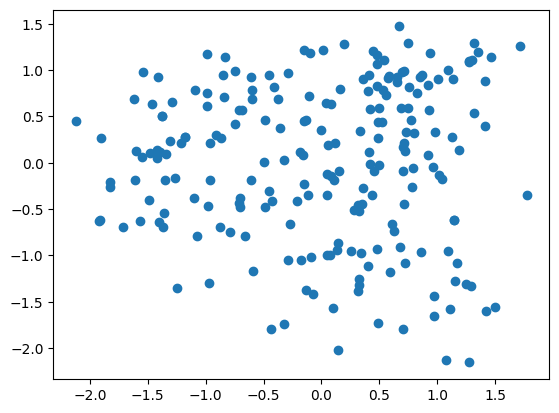

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# assume X is your numerical dataframe
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1])
plt.show()


In [72]:
k = 25
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Predict for test
clusters_test = kmeans.predict(X_scaled)

# Map back to IDs if needed
results_df = pd.DataFrame({
    "ID": city_ids,
    "Cluster": clusters_test
})

c:\Users\OMEN\anaconda3\envs\gensim-env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
results_df['ID'].shape

(215,)

In [74]:
final_df2 = final_df.merge(results_df, left_index=True, right_on='ID')
final_df2 = final_df2.merge(X_features[['tokens', 'best_time_list']], left_index=True, right_index=True)
final_df2.head()

,Country_PCA_1,Country_PCA_2,Country_PCA_3,Country_PCA_4,Country_PCA_5,visit_time,0,1,2,3,...,44,45,46,47,48,49,ID,Cluster,tokens,best_time_list
0,-0.289581,-0.104868,-0.043624,-0.042221,9.335400e-16,0.717291,0.098418,0.740478,-0.961638,0.103041,...,0.124218,0.495602,-0.211896,-0.268275,0.197212,-0.241438,1,18,"[history, culture, museums, theatre, shopping,...","[Apr, May, Jun, Sep, Oct]"
1,-0.296417,-0.115632,-0.059075,-0.064795,5.370054e-16,0.717291,0.027173,0.792330,-0.894934,-0.008606,...,0.195213,0.738503,-0.251238,-0.186158,-0.000080,-0.917306,2,18,"[art, museums, landmarks, culture, history, fo...","[Apr, May, Jun, Sep, Oct]"
2,-0.289581,-0.104868,-0.043624,-0.042221,1.812545e-16,1.034606,-0.413253,0.808456,-1.207943,0.056256,...,-0.054247,0.492383,-0.144160,-0.328072,-0.260362,-0.194875,3,22,"[history, ancient, ruins, culture, art, food, ...","[Apr, May, Jun, Sep, Oct]"
3,-0.289581,-0.104868,-0.043624,-0.042221,-2.437764e-16,0.717291,0.011297,0.593843,-0.984343,0.059265,...,0.220637,0.486656,-0.297851,-0.218123,0.191839,-0.141318,4,18,"[history, culture, nightlife, art, museums, mu...","[May, Jun, Jul, Aug, Sep]"
4,-0.276813,-0.088408,-0.028641,-0.024882,1.451370e-16,1.034606,-0.541960,0.627872,-1.236608,0.196906,...,0.042436,0.494932,-0.151014,-0.239553,0.058564,-0.235294,5,18,"[art, museums, nightlife, food, culture, histo...","[Apr, May, Jun, Sep, Oct]"


In [75]:
df = df.reset_index(drop=True)
final_df2 = final_df2.reset_index(drop=True)

# Merge while keeping only the relevant columns
final_df3 = pd.concat([
    df[['City', 'Country']],
    final_df2[['tokens', 'visit_time', 'Cluster']]
], axis=1)

# View the result
final_df3

,City,Country,tokens,visit_time,Cluster
0,London,United Kingdom,"[history, culture, museums, theatre, shopping,...",0.717291,18.0
1,Paris,France,"[art, museums, landmarks, culture, history, fo...",0.717291,18.0
2,Rome,Italy,"[history, ancient, ruins, culture, art, food, ...",1.034606,22.0
3,Berlin,Germany,"[history, culture, nightlife, art, museums, mu...",0.717291,18.0
4,Madrid,Spain,"[art, museums, nightlife, food, culture, histo...",1.034606,18.0
...,...,...,...,...,...
210,Mathura,India,"[religion, pilgrimage, temples, krishna, history]",0.171084,15.0
211,Mussoorie,India,"[hill, station, nature, colonial, charm, mount...",-0.920555,7.0
212,Rameswaram,India,"[pilgrimage, temples, island, mythology, beaches]",-0.920555,15.0
213,Auli,India,"[skiing, snow, himalayas, winter, sports, rope...",-0.425390,23.0


In [60]:
# for k in range(2, 25):
#     km = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = km.fit_predict(X)
#     score = silhouette_score(X, labels)
#     print(f"k={k}, silhouette score={score:.4f}")

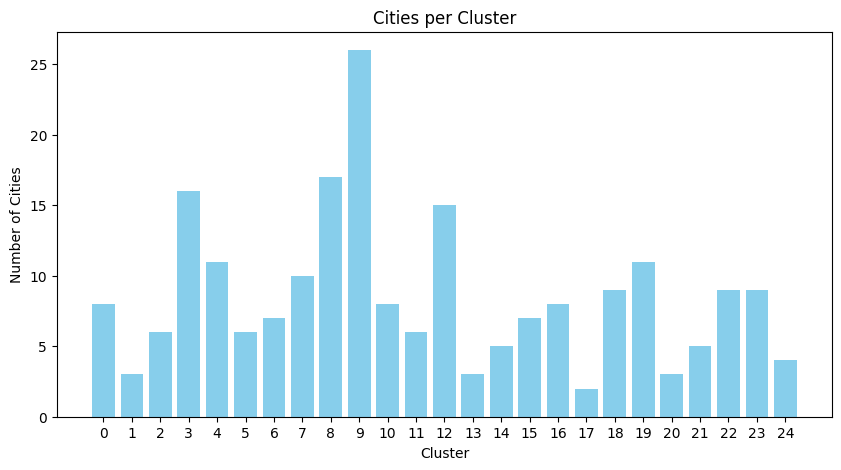

In [76]:
final_df3['Cluster'].value_counts().sort_index()
cluster_counts = pd.Series(final_df3['Cluster']).value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Cities')
plt.title('Cities per Cluster')
plt.xticks(cluster_counts.index)
plt.show()

In [77]:
for cluster_id in sorted(final_df3['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    cluster_cities = final_df3.loc[final_df3['Cluster'] == cluster_id, 'City']
    print(cluster_cities.tolist())


Cluster 0.0:
['Jaipur', 'Agra', 'Jodhpur', 'Hampi', 'Mahabalipuram', 'Gwalior', 'Orchha', 'Aurangabad']

Cluster 1.0:
['Mumbai', 'Kuala Lumpur', 'Madurai']

Cluster 2.0:
['Munnar', 'Srinagar', 'Coorg (Kodagu)', 'Wayanad', 'Chikmagalur', 'Tawang']

Cluster 3.0:
['Hong Kong', 'Bangkok', 'Istanbul', 'Santiago', 'Zurich', 'Sapporo', 'Chengdu', 'Busan', 'Da Nang', 'Calgary', 'Wellington', 'Taipei', 'Manila', 'Nairobi', 'Ushuaia', 'Indore']

Cluster 4.0:
['Denver', 'Vancouver', 'Oslo', 'Cape Town', 'Zanzibar', 'Santorini', 'Amalfi Coast', 'Lofoten Islands', 'Goreme (Cappadocia)', 'Wadi Rum', 'Leh']

Cluster 5.0:
['Kolkata', 'Amritsar', 'Mysuru', 'Rann of Kutch', 'Hyderabad', 'Lucknow']

Cluster 6.0:
['Stockholm', 'Venice', 'Moscow', 'St. Petersburg', 'Helsinki', 'Havana', 'Dubrovnik']

Cluster 7.0:
['Christchurch', 'Shimla', 'Darjeeling', 'Shillong', 'Ooty', 'Kodaikanal', 'Nainital', 'Visakhapatnam', 'Mount Abu', 'Mussoorie']

Cluster 8.0:
['Athens', 'Chiang Mai', 'Cusco', 'Auckland', 'Goa'

In [78]:
def print_cluster_details(cluster_num):
    cluster_cities = final_df3[final_df3['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num} Cities:")
    for _, row in cluster_cities.iterrows():
        print(f"- {row['City']}: Tokens: {row['tokens']}, Best Time: {row['visit_time']}")

print_cluster_details(9)


Cluster 9 Cities:
- Hanoi: Tokens: ['culture', 'history', 'food', 'french', 'colonial', 'architecture', 'street', 'life', 'halong', 'bay', 'nearby'], Best Time: -0.42538997700433834
- Ho Chi Minh City: Tokens: ['history', 'war', 'museums', 'food', 'nightlife', 'french', 'colonial', 'architecture', 'mekong', 'delta', 'nearby'], Best Time: -0.9205549703282109
- Mexico City: Tokens: ['history', 'aztec/colonial', 'culture', 'museums', 'food', 'art', 'frida', 'kahlo', 'ruins', 'teotihuacan', 'nearby'], Best Time: -0.42538997700433834
- Lima: Tokens: ['food', 'ceviche', 'gastronomy', 'history', 'colonial', 'museums', 'coastline', 'culture'], Best Time: 0.1710840517686787
- BogotÃ¡: Tokens: ['culture', 'history', 'la', 'candelaria', 'museums', 'gold', 'museum', 'food', 'street', 'art', 'mountains', 'nearby'], Best Time: 0.1710840517686787
- Seville: Tokens: ['flamenco', 'history', 'culture', 'architecture', 'moorish', 'food', 'festivals', 'semana', 'santa', 'feria'], Best Time: 0.717290603875

In [57]:
import numpy as np
import pandas as pd

# Map months to quarters
QUARTERS = {
    "Q1": {"Jan","Feb","Mar"},
    "Q2": {"Apr","May","Jun"},
    "Q3": {"Jul","Aug","Sep"},
    "Q4": {"Oct","Nov","Dec"},
}

def parse_months_to_quarters(best_time_str: str):
    months = [m.strip()[:3].title() for m in best_time_str.split(",") if m.strip()]
    q1 = int(any(m in QUARTERS["Q1"] for m in months))
    q2 = int(any(m in QUARTERS["Q2"] for m in months))
    q3 = int(any(m in QUARTERS["Q3"] for m in months))
    q4 = int(any(m in QUARTERS["Q4"] for m in months))
    return [q1, q2, q3, q4]

def tokens_to_vec(tokens_str: str, model, dim: int):
    toks = [t.strip().lower() for t in tokens_str.split(",") if t.strip()]
    vecs = [model[w] for w in toks if w in model.key_to_index]
    if vecs:
        return np.mean(vecs, axis=0)
    return np.zeros(dim, dtype=float)


In [58]:
def build_new_city_row(city:str, country:str, best_time:str, tokens:str,
                       COUNTRY_DUMMY_COLS, pca_country, pca_months,
                       glove_model, feature_cols_order):
    # --- Country OHE vector in the SAME column space/order as training ---
    country_ohe = np.zeros(len(COUNTRY_DUMMY_COLS), dtype=float)
    col_name = f"Country_{country}"
    if col_name in COUNTRY_DUMMY_COLS:
        country_ohe[COUNTRY_DUMMY_COLS.index(col_name)] = 1.0
    # PCA -> 5 dims
    country_pca = pca_country.transform([country_ohe]).ravel()  # shape (5,)

    # --- visit_time (PCA of Q1..Q4) ---
    q_flags = parse_months_to_quarters(best_time)               # [q1,q2,q3,q4]
    visit_time = float(pca_months.transform([q_flags]).ravel()[0])

    # --- token embedding (e.g., 50 dims) ---
    dim = glove_model.vector_size
    tok_vec = tokens_to_vec(tokens, glove_model, dim)           # shape (dim,)

    # --- Assemble into your final_df schema ---
    feat = {f"Country_PCA_{i+1}": country_pca[i] for i in range(5)}
    feat["visit_time"] = visit_time
    for i in range(len(tok_vec)):
        feat[str(i)] = float(tok_vec[i])  # columns "0".."49"

    row = pd.DataFrame([feat])
    # Reorder columns EXACTLY like training
    row = row.reindex(columns=[str(c) for c in feature_cols_order], fill_value=0.0)
    return row


In [60]:
def predict_new_city(city:str, country:str, best_time:str, tokens:str,
                     COUNTRY_DUMMY_COLS, pca_country, pca_months,
                     glove_model, scaler, kmeans, feature_cols_order,
                     catalog_df):
    # Build feature row
    new_row = build_new_city_row(city, country, best_time, tokens,
                                 COUNTRY_DUMMY_COLS, pca_country, pca_months,
                                 glove_model, feature_cols_order)

    # Scale & predict
    new_scaled = scaler.transform(new_row)
    cluster = int(kmeans.predict(new_scaled)[0])

    # Similar cities from your catalog
    similar = (
        catalog_df.loc[catalog_df["Cluster"] == cluster, ["City","Country"]]
        .sort_values(["Country","City"])
        .reset_index(drop=True)
    )

    return {"city": city,
            "country": country,
            "predicted_cluster": cluster,
            "similar_cities": similar}

feature_cols_order = final_df.columns.astype(str).tolist()


In [85]:
# Artifacts from training (you should already have these)
# COUNTRY_DUMMY_COLS = [f"Country_{c}" for c in sorted(df['Country'].unique())]
# pca_country, pca_months, glove_model, scaler, kmeans already fitted
# feature_cols_order = final_df.columns.astype(str).tolist()
# catalog_df = readable df with ['City','Country','Cluster']

res = predict_new_city(
    city="Rishikesh",
    country="India",
    best_time="Feb, Mar, Sep, Oct",
    tokens="history",
    COUNTRY_DUMMY_COLS=country_cols,
    pca_country=pca,
    pca_months=pca_months,
    glove_model=glove_model,
    scaler=scaler,
    kmeans=kmeans,
    feature_cols_order=feature_cols_order,
    catalog_df=final_df3
)

print("Predicted cluster:", res["predicted_cluster"])
print(res["similar_cities"].head(10))


Predicted cluster: 15
             City  Country
0        Salvador   Brazil
1       Dubrovnik  Croatia
2         Hamburg  Germany
3  Kochi (Cochin)    India
4          Mumbai    India
5     Pondicherry    India
6         Udaipur    India
7          Bergen   Norway
8            Lima     Peru


c:\Users\OMEN\anaconda3\envs\gensim-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\OMEN\anaconda3\envs\gensim-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\OMEN\anaconda3\envs\gensim-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
